In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette("rocket")

In [26]:
import math

def rk2(f, a, b, ini, n=100000):
    h = (b - a)/n
    X = np.linspace(a, b, n)
    y = []
    
    for i in range(len(X)):
        if i == 0:
            k0 = h*f(ini[0], ini[1])
            k1 = h*f(ini[0] + h/2, ini[1] + k0/2)
            k2 = h*f(ini[0] + h/2, ini[1] + k1/2)
            k3 = h*f(ini[0] + h, ini[1] + k2)
            y.append(ini[1] + (k0 + 2*k1 + 2*k2 + k3)/6.0)
        else:
            k0 = h*f(X[i-1], y[i-1])
            k1 = h*f(X[i-1] + h/2, y[i-1] + k0/2)
            k2 = h*f(X[i-1] + h/2, y[i-1] + k1/2)
            k3 = h*f(X[i], y[i-1] + k2)
            y.append(y[i - 1] + (k0 + 2*k1 + 2*k2 + k3)/6.0)
                     
    return  pd.DataFrame({"x":X, "f(x)":y})   

In [36]:
f = lambda x, y: np.sqrt(x)

A = rk2(f, .01, 20, [.01, (2/3)*np.power(.01, 3/2)])

<AxesSubplot:xlabel='x', ylabel='f(x)'>

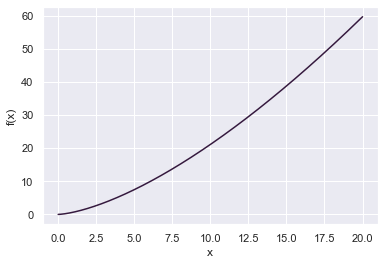

In [37]:
sns.lineplot(data=A, x="x", y="f(x)")

<AxesSubplot:xlabel='x', ylabel='f(x)'>

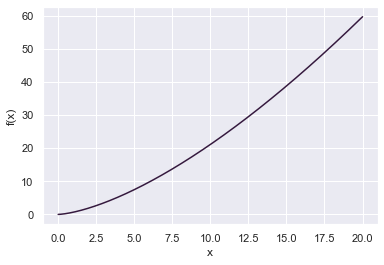

In [35]:
X = np.linspace(.01, 20, 1000)
f = lambda x, y: math.exp(x)

y = (2/3)*np.power(X, 3/2)

sns.lineplot(data=pd.DataFrame({"x":X, "f(x)":y}), x="x", y="f(x)")